In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Load the data from Google Drive
file_path = '/content/drive/My Drive/historical_logs/historical_logss.log'
df = pd.read_json(file_path, lines=True)

# Display the first few rows
df.head()


Mounted at /content/drive


,timestamp,activity,detail,malicious,machine
0,2024-05-16 02:43:29.170730,repair_database,Details of repair_database,0,machine_10
1,2024-05-16 18:56:29.170730,run_docker_container,Details of run_docker_container,0,machine_6
2,2024-05-16 21:11:29.170730,restore_files,Details of restore_files,0,machine_6
3,2024-05-16 23:25:29.170730,push_docker_image,Details of push_docker_image,0,machine_1
4,2024-05-17 13:51:29.170730,add_firewall_rule,Details of add_firewall_rule,0,machine_2


In [ ]:
df.columns

Index(['timestamp', 'activity', 'detail', 'malicious', 'machine'], dtype='object')

In [ ]:
# Summary statistics for categorical columns
df.describe(include=['object'])


,activity,detail,machine
count,3353,3353,3353
unique,132,132,10
top,check_firewall_status,Details of check_firewall_status,machine_5
freq,39,39,380


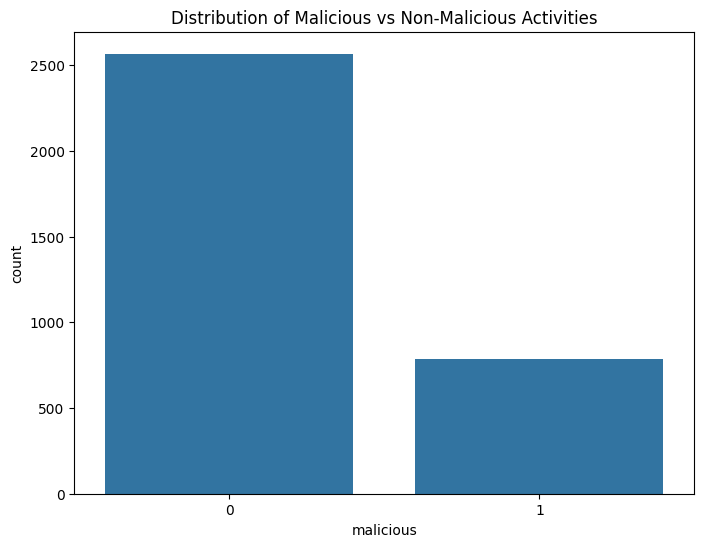

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='malicious', data=df)
plt.title('Distribution of Malicious vs Non-Malicious Activities')
plt.show()


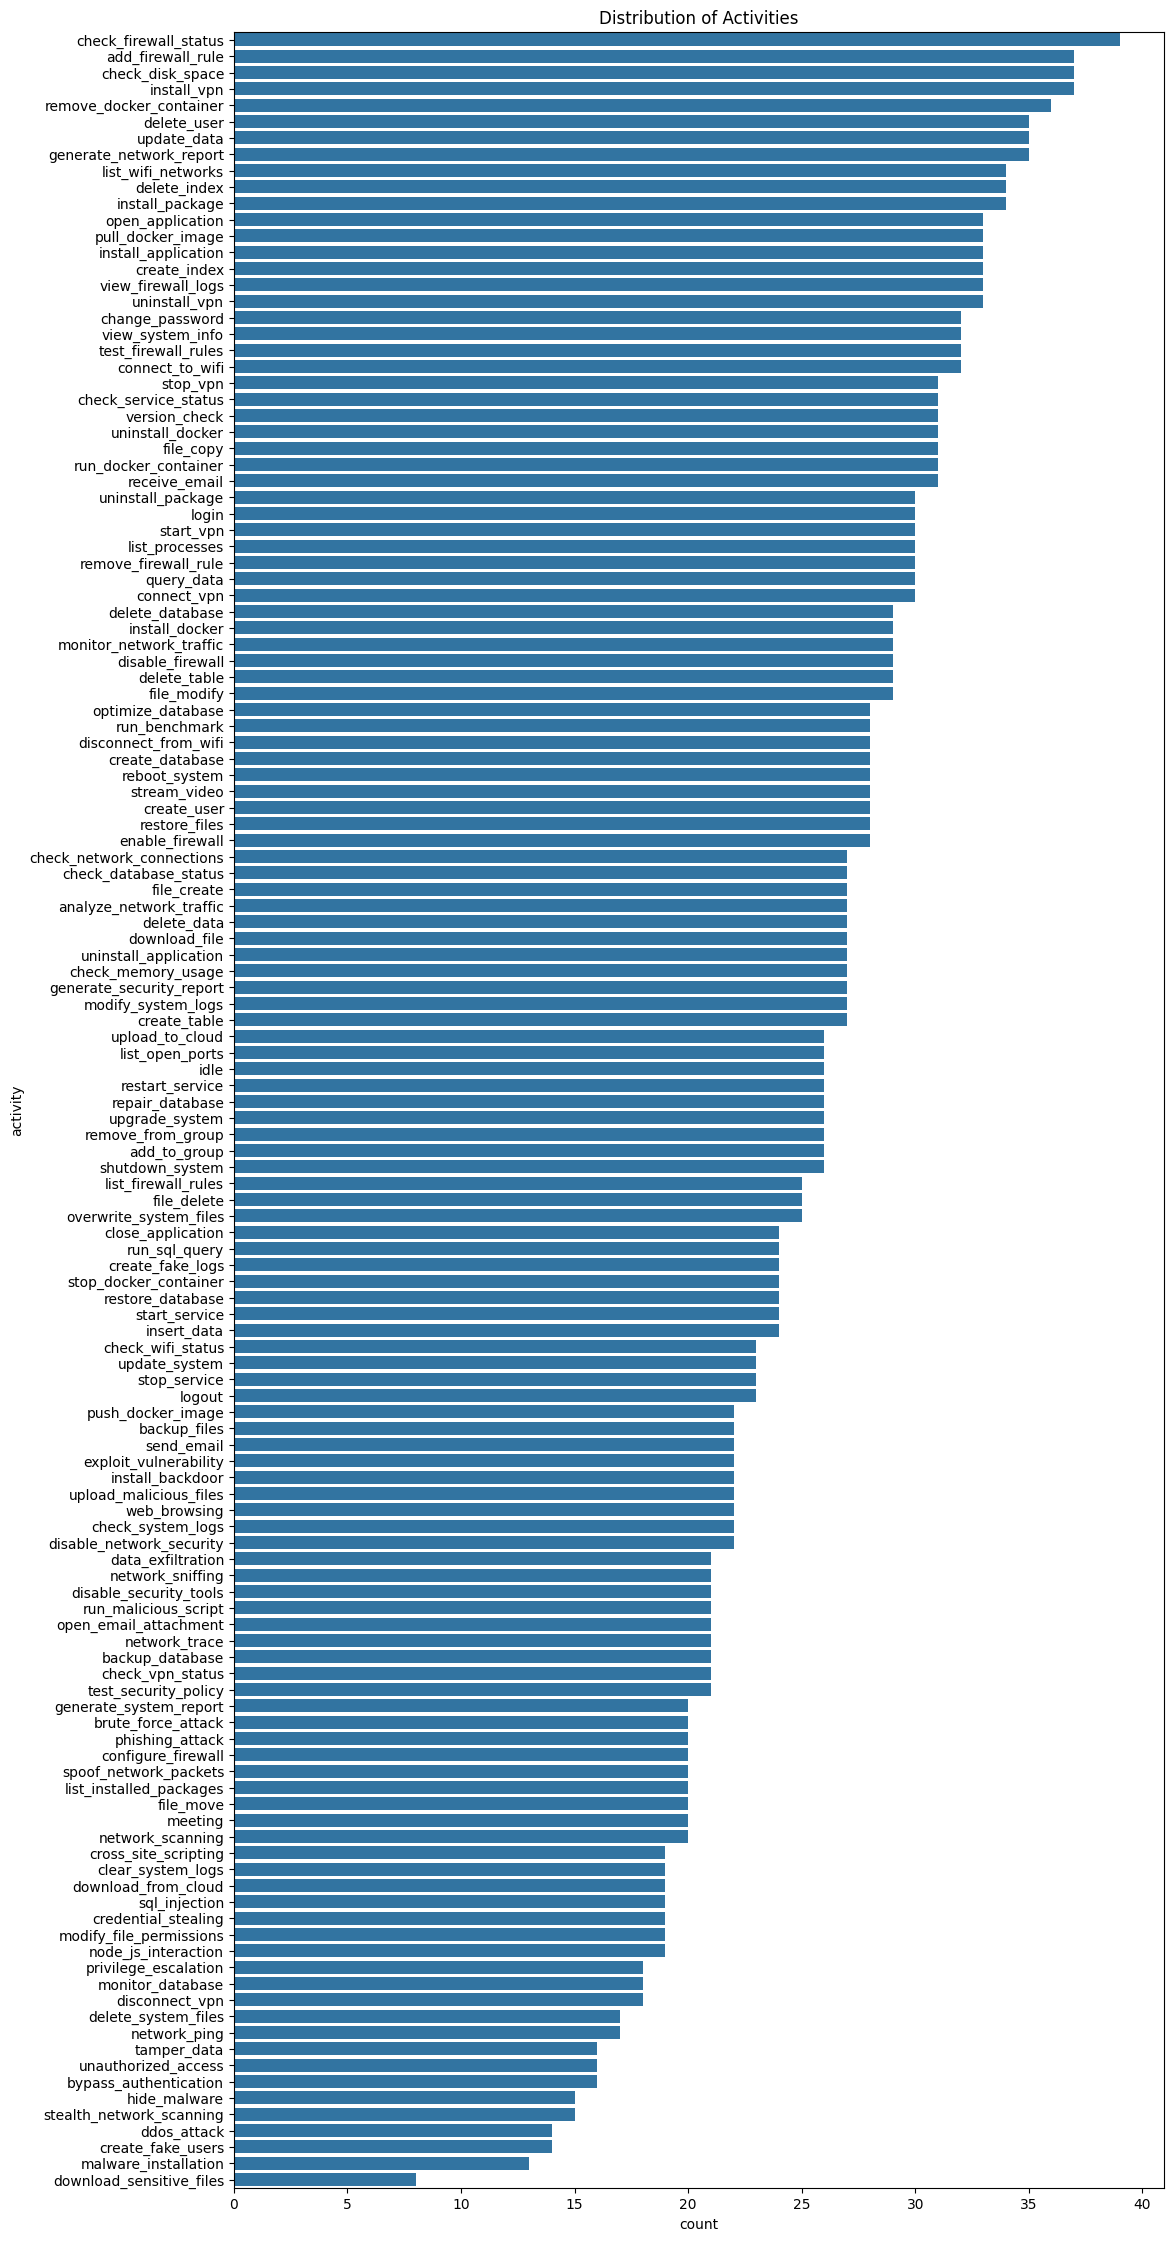

In [ ]:
plt.figure(figsize=(12, 28))
sns.countplot(y='activity', data=df, order=df['activity'].value_counts().index)
plt.title('Distribution of Activities')
plt.show()


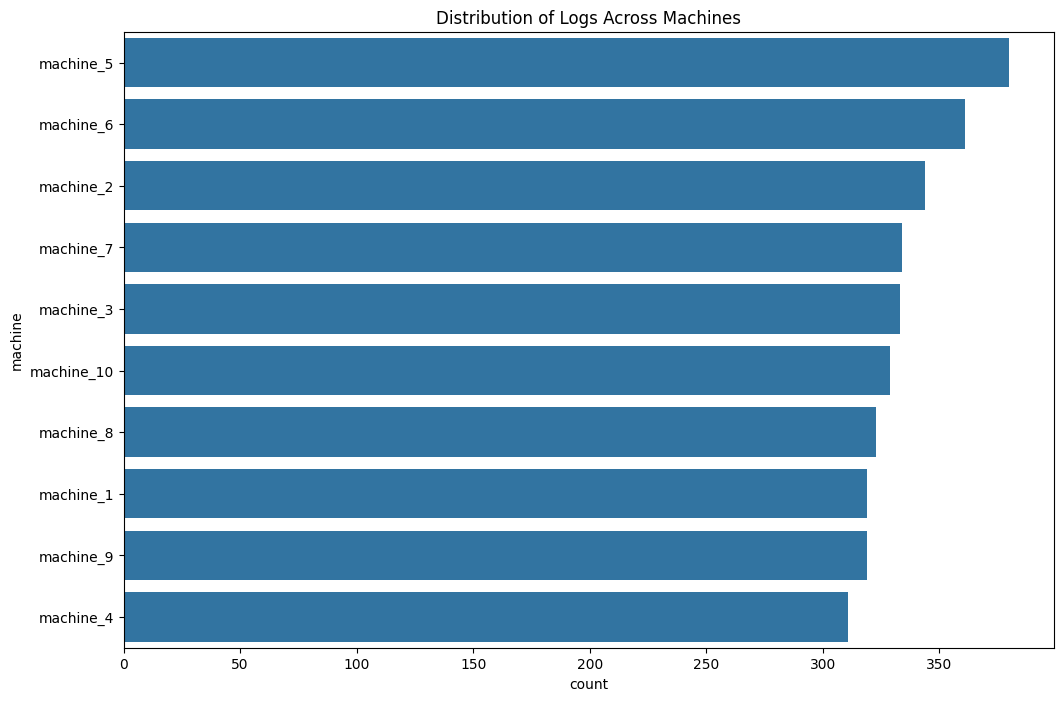

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='machine', data=df, order=df['machine'].value_counts().index)
plt.title('Distribution of Logs Across Machines')
plt.show()


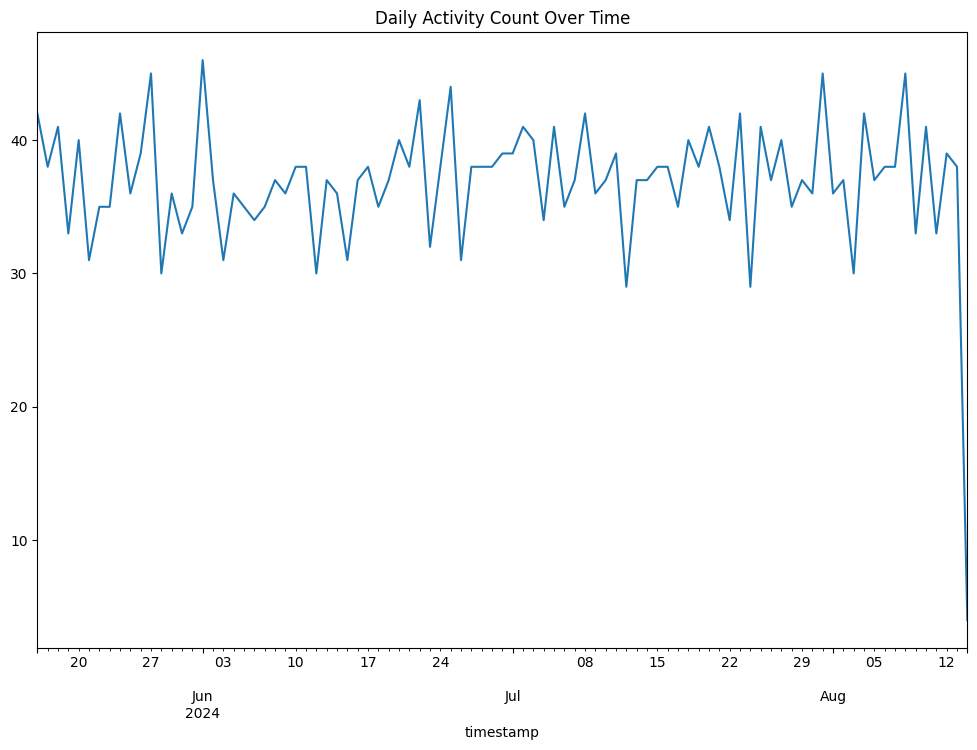

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df['activity'].resample('D').count().plot(figsize=(12, 8))
plt.title('Daily Activity Count Over Time')
plt.show()


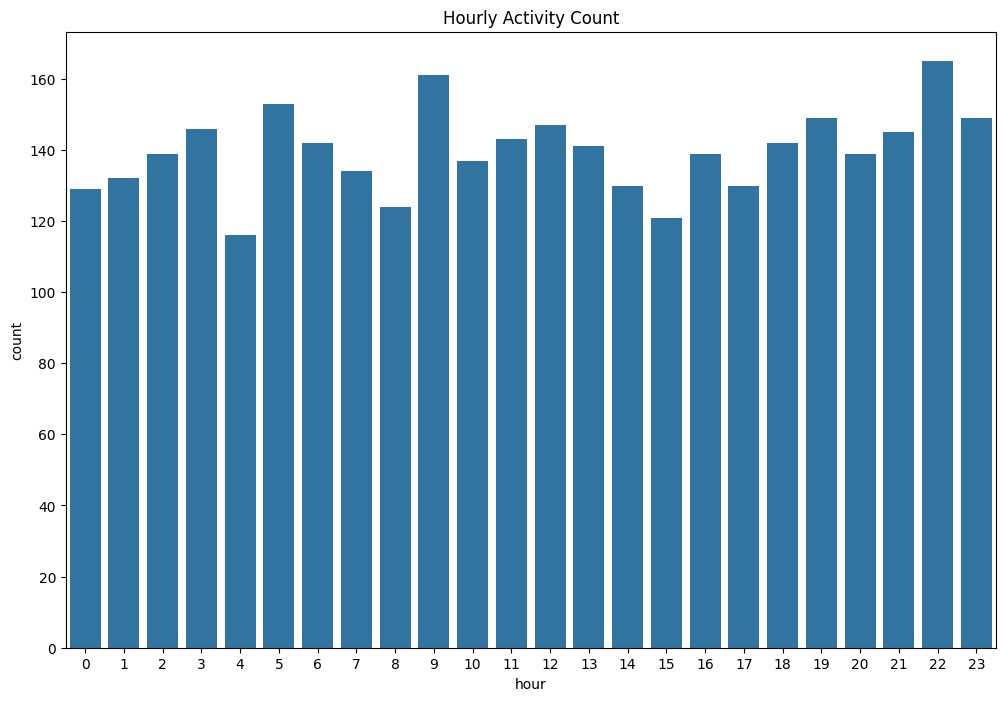

In [ ]:
df['hour'] = df.index.hour
plt.figure(figsize=(12, 8))
sns.countplot(x='hour', data=df)
plt.title('Hourly Activity Count')
plt.show()


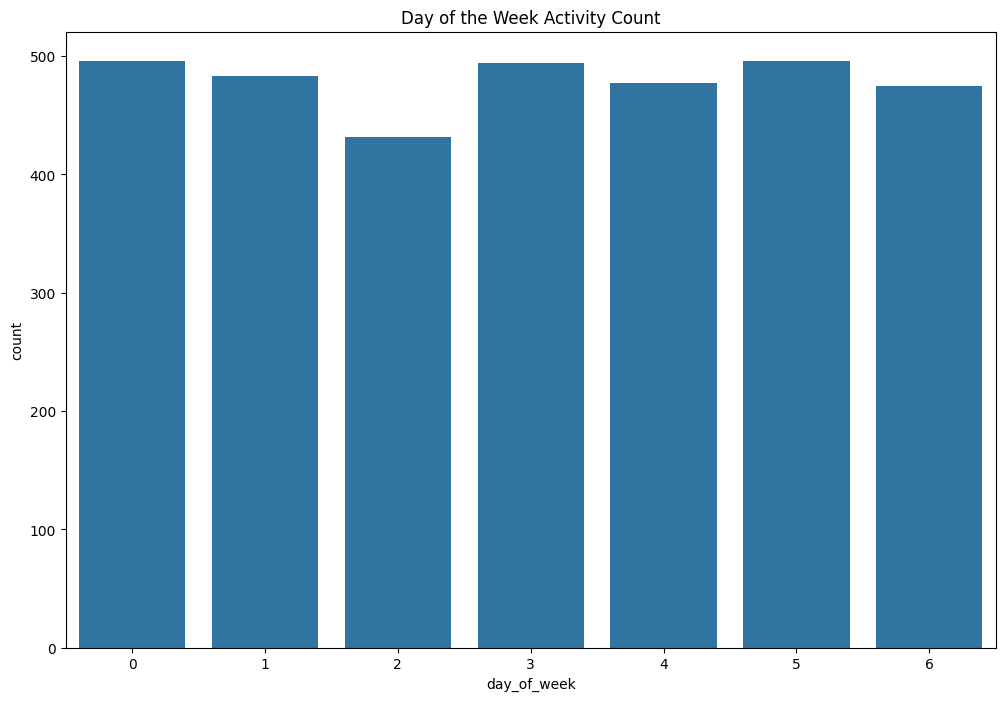

In [ ]:
df['day_of_week'] = df.index.dayofweek
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_week', data=df)
plt.title('Day of the Week Activity Count')
plt.show()


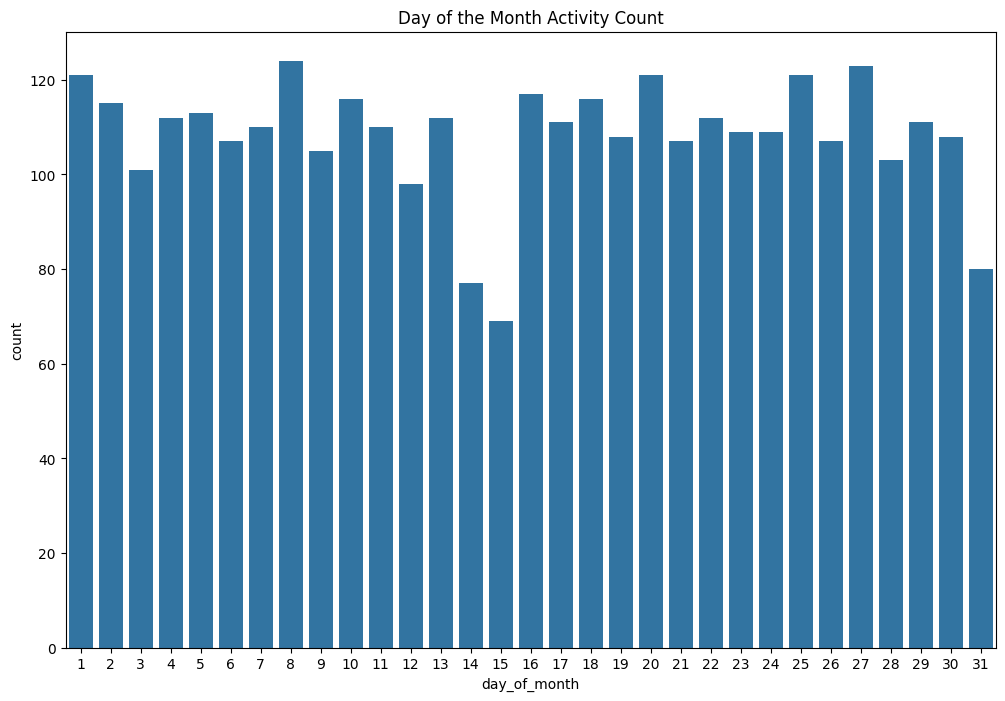

In [ ]:
df['day_of_month'] = df.index.day
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_month', data=df)
plt.title('Day of the Month Activity Count')
plt.show()


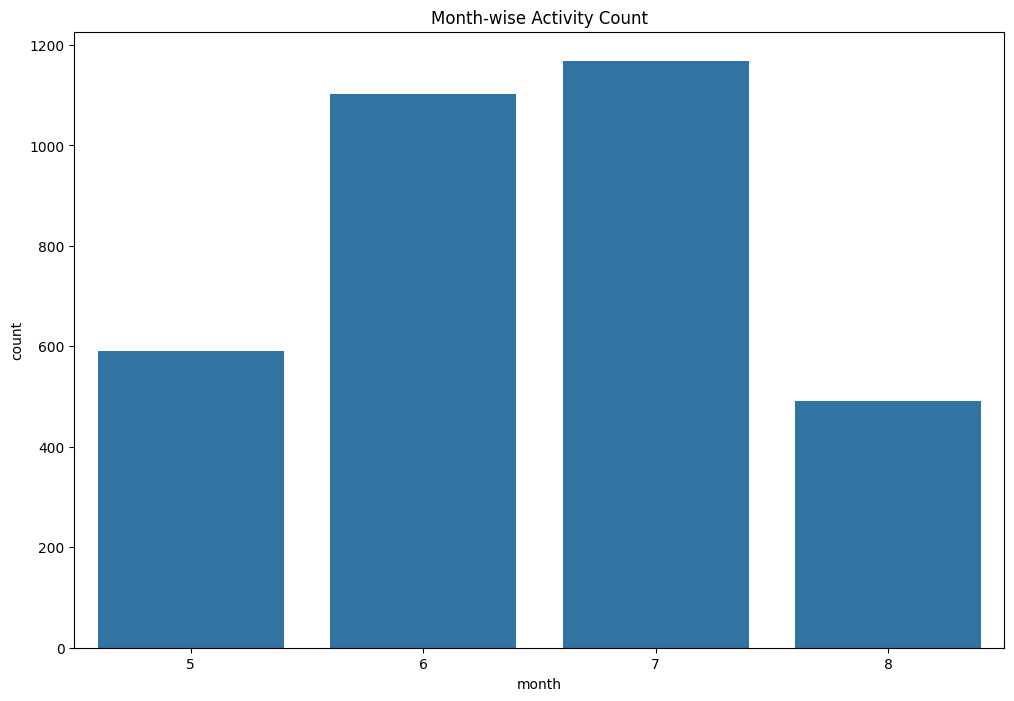

In [ ]:
df['month'] = df.index.month
plt.figure(figsize=(12, 8))
sns.countplot(x='month', data=df)
plt.title('Month-wise Activity Count')
plt.show()


In [ ]:
# Drop the 'detail' column
df_encoded = df.drop(columns=['detail'])

# Encode categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['activity', 'machine'])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

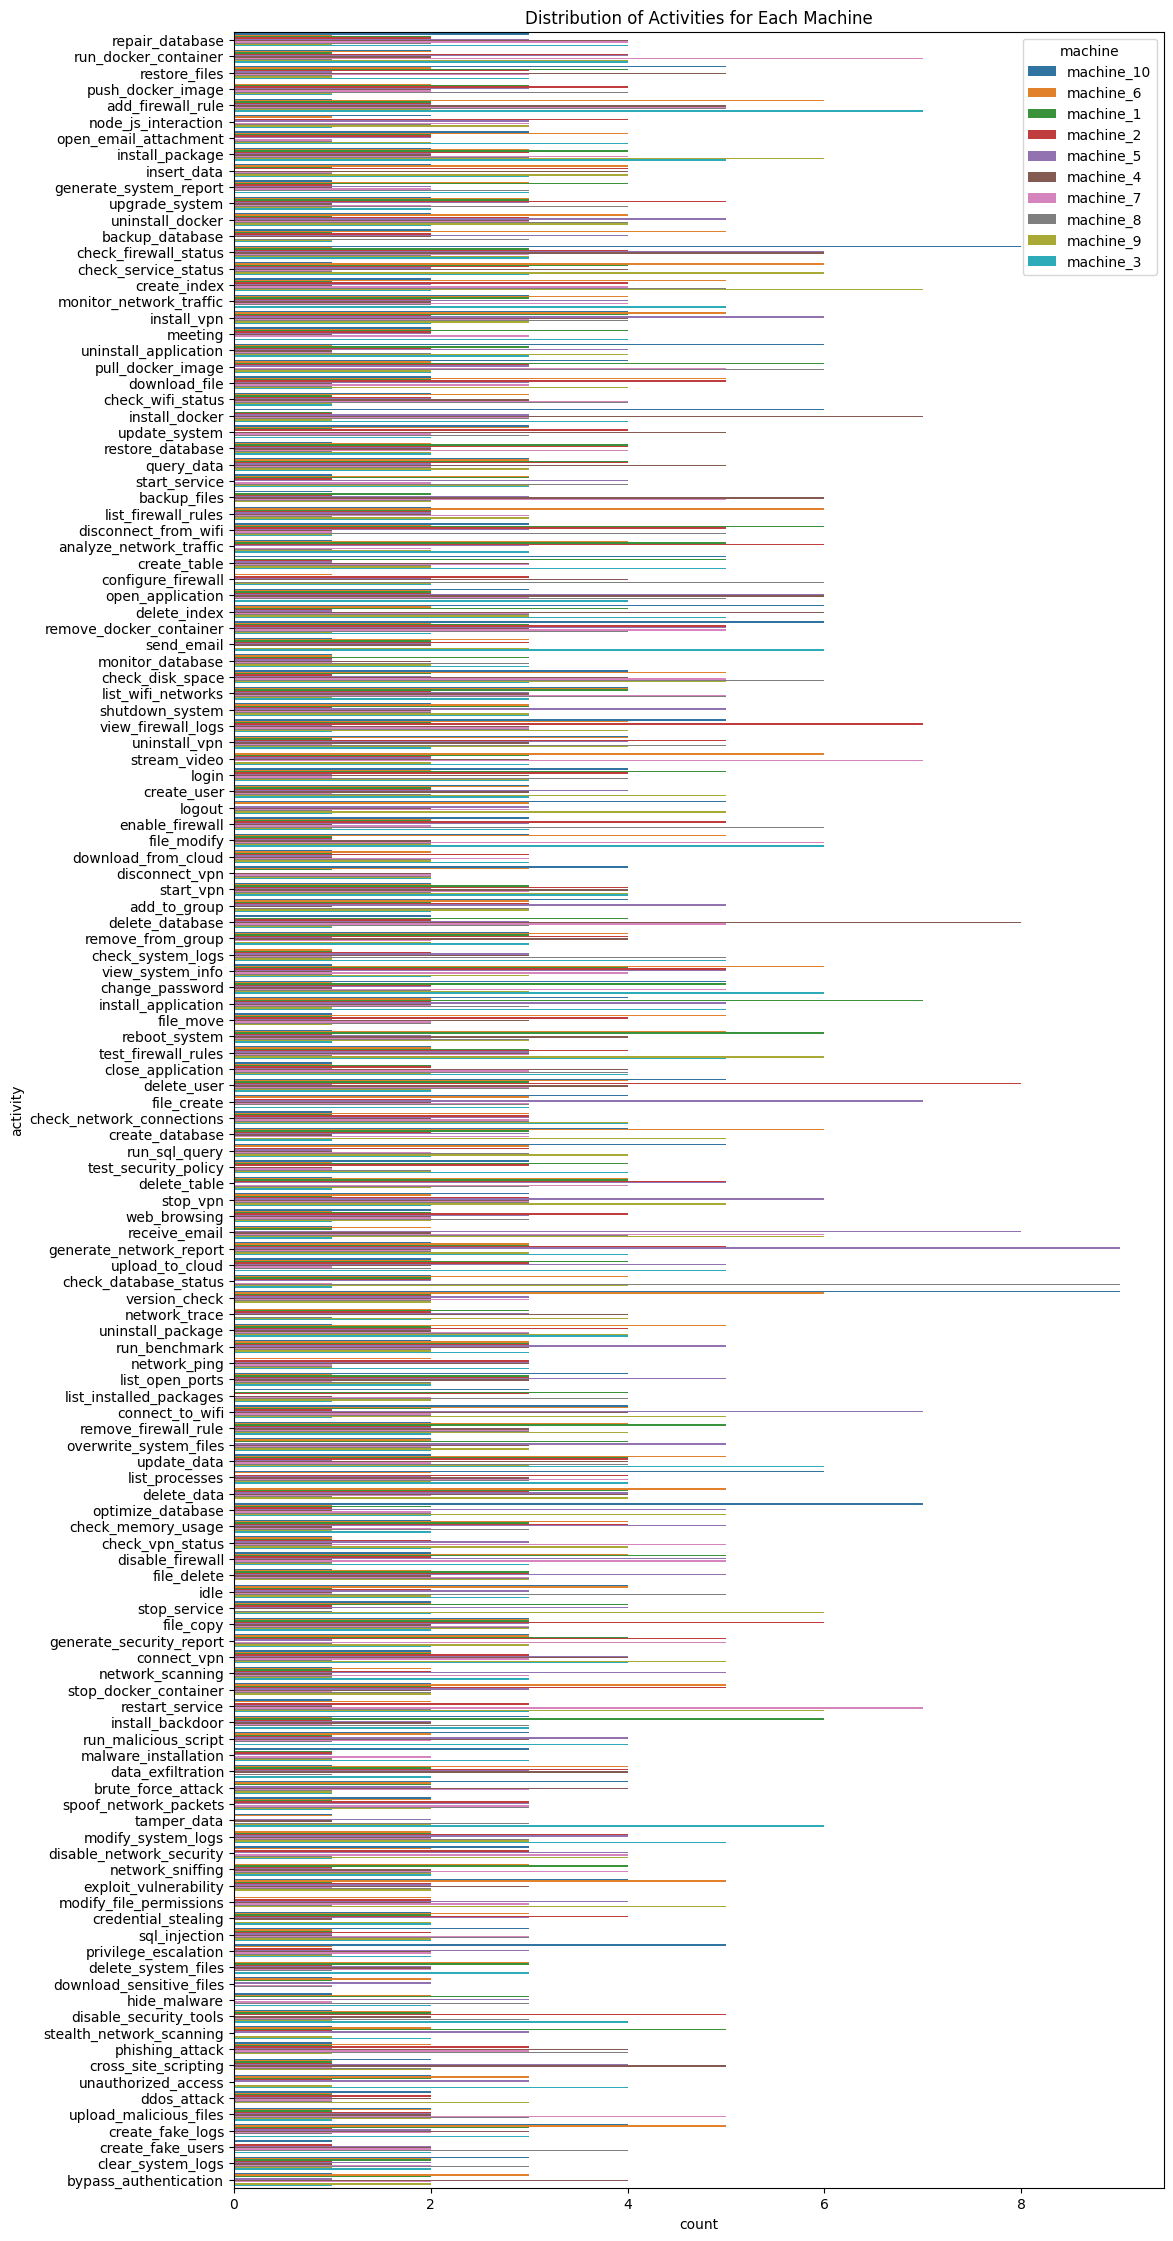

In [ ]:
plt.figure(figsize=(12, 28))
sns.countplot(y='activity', hue='machine', data=df)
plt.title('Distribution of Activities for Each Machine')
plt.show()


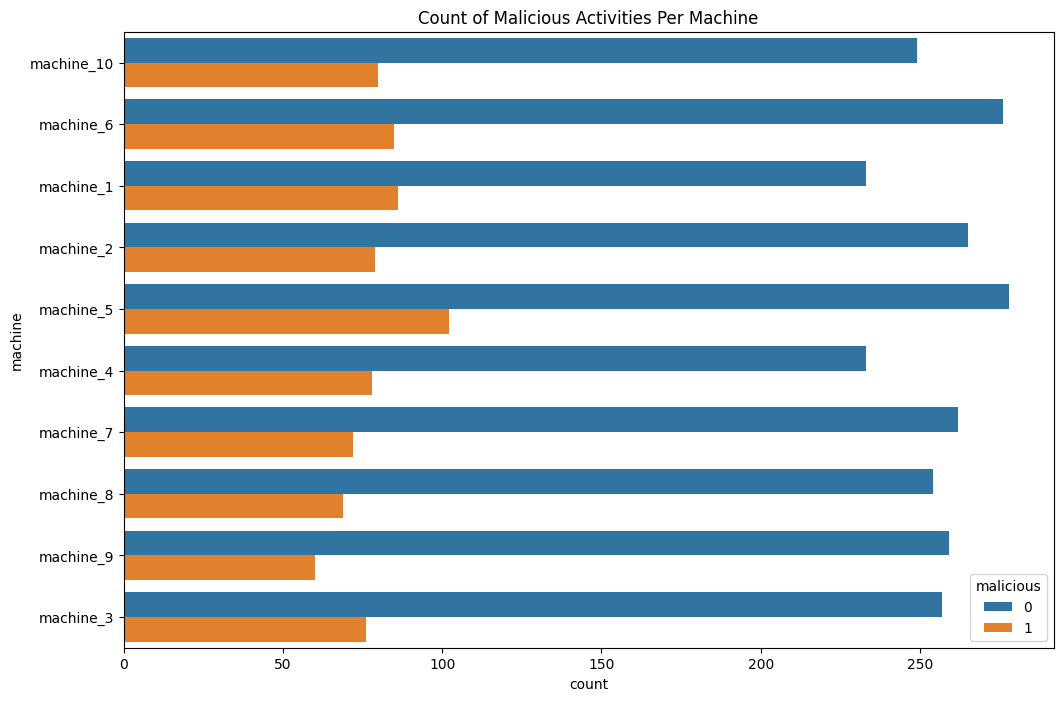

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='machine', hue='malicious', data=df)
plt.title('Count of Malicious Activities Per Machine')
plt.show()


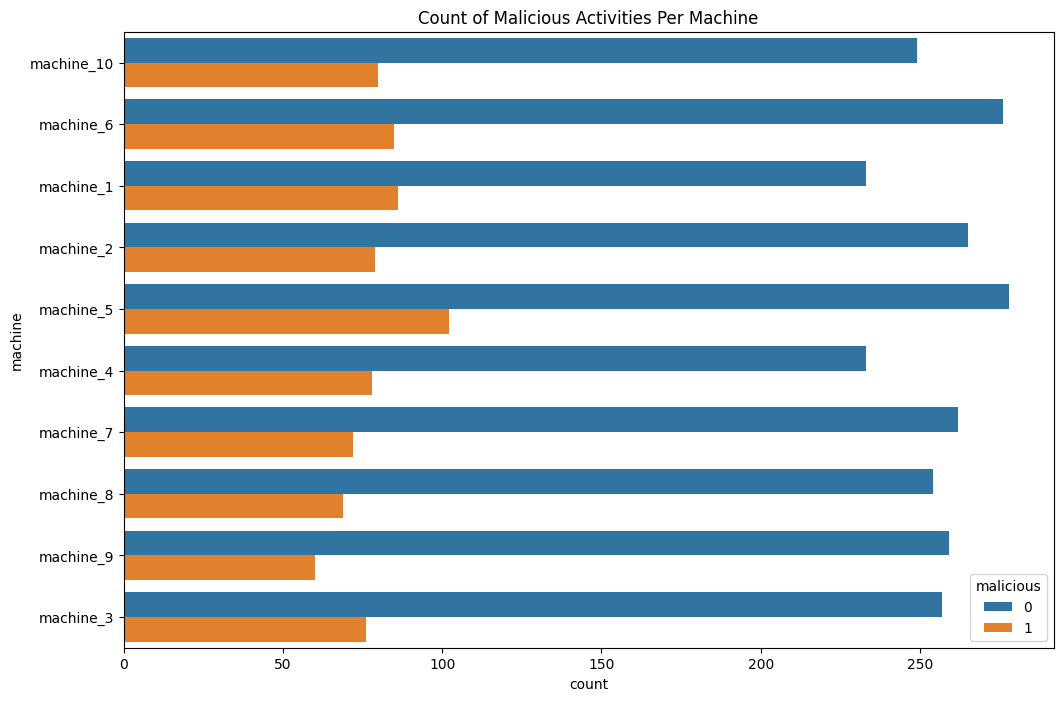

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='machine', hue='malicious', data=df)
plt.title('Count of Malicious Activities Per Machine')
plt.show()


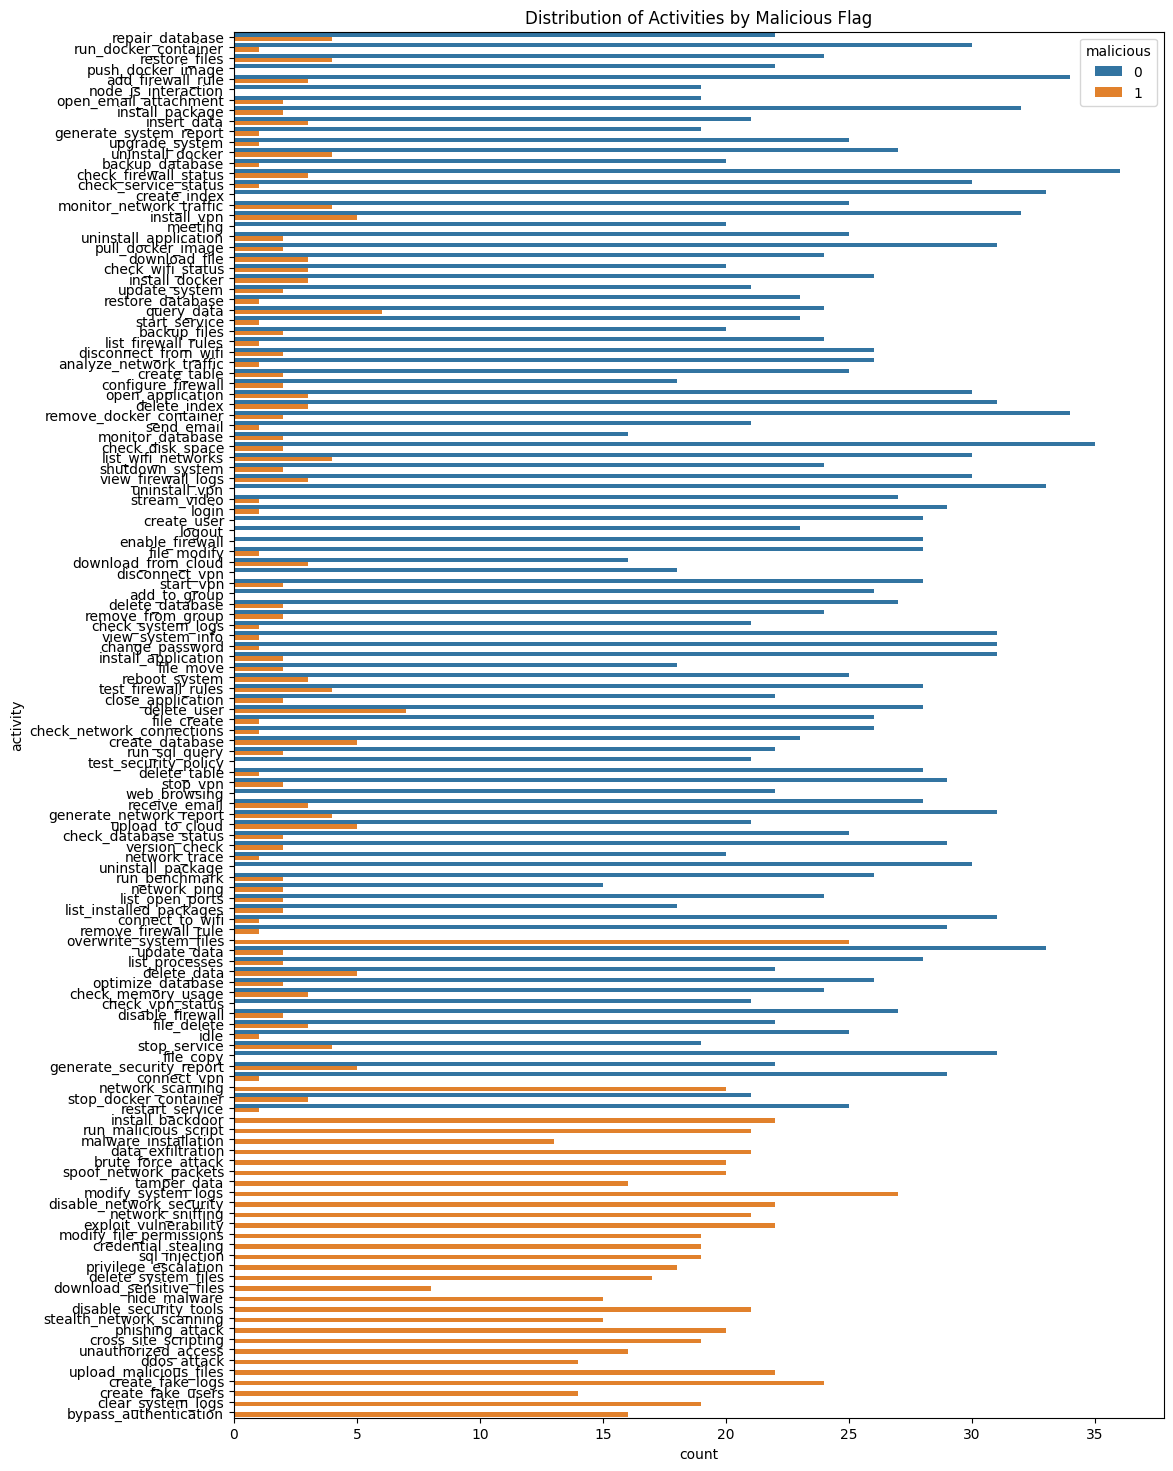

In [ ]:
plt.figure(figsize=(12, 18))
sns.countplot(y='activity', hue='malicious', data=df)
plt.title('Distribution of Activities by Malicious Flag')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_encoded = pd.get_dummies(df.drop(columns=['detail']), columns=['activity', 'machine'])

# Separate the features and the target variable
X = df_encoded.drop(columns=['malicious'])
y = df_encoded['malicious']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       771
           1       1.00      0.72      0.84       235

    accuracy                           0.93      1006
   macro avg       0.96      0.86      0.90      1006
weighted avg       0.94      0.93      0.93      1006

Logistic Regression Confusion Matrix:


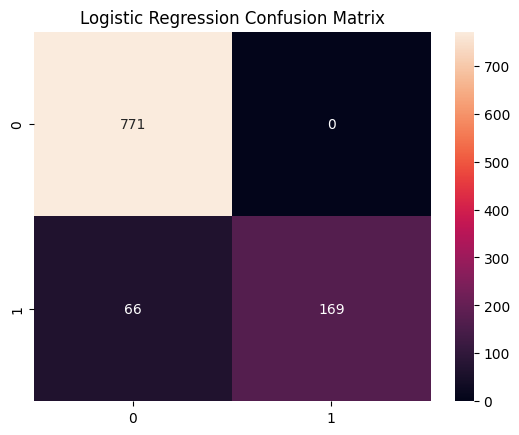

In [ ]:
# Classification with Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       771
           1       0.99      0.72      0.83       235

    accuracy                           0.93      1006
   macro avg       0.95      0.86      0.90      1006
weighted avg       0.94      0.93      0.93      1006

Random Forest Confusion Matrix:


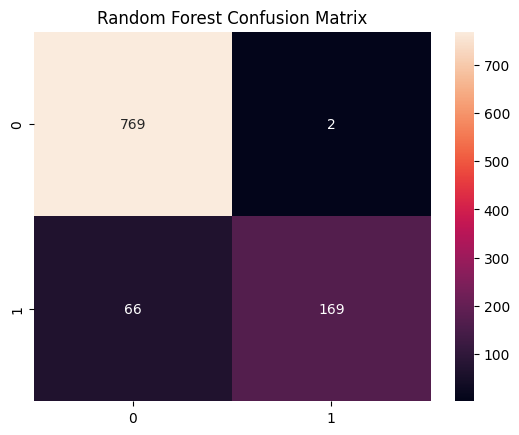

In [ ]:
# Classification with Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title('Random Forest Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Clustering Results:
cluster
1    2946
0     407
Name: count, dtype: int64


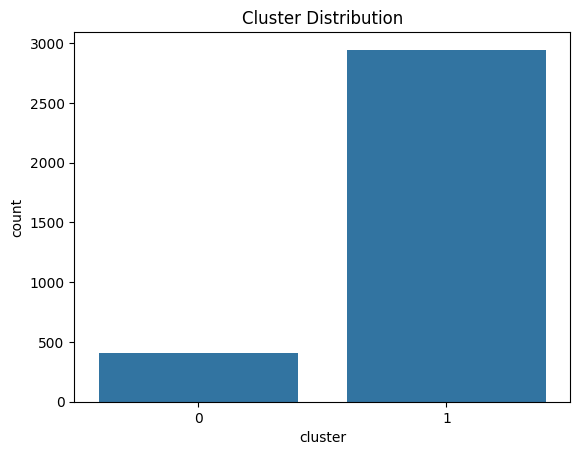

In [ ]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
X_scaled = scaler.fit_transform(X)  # Scale the entire feature set
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

print("KMeans Clustering Results:")
print(df['cluster'].value_counts())

# Visualize the clustering
sns.countplot(x='cluster', data=df)
plt.title('Cluster Distribution')
plt.show()

Logistic Regression Cross-Validation Scores: [0.95230999 0.94336811 0.93293592 0.93880597 0.93134328]
Mean CV Score (Logistic Regression): 0.9397526525346442
Random Forest Cross-Validation Scores: [0.95230999 0.94336811 0.93293592 0.93731343 0.93134328]
Mean CV Score (Random Forest): 0.9394541450719578
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Random Forest): 0.9420514449031439


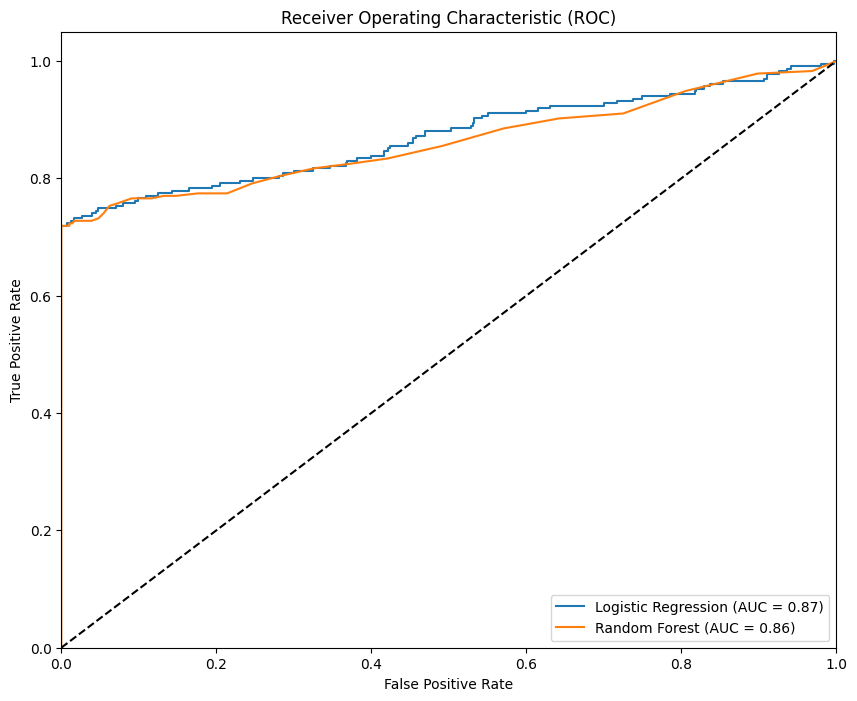

In [ ]:
# prompt: lets do cross validation, matrix, and plotting

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_scaled, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores_log_reg)
print("Mean CV Score (Logistic Regression):", np.mean(cv_scores_log_reg))

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score (Random Forest):", np.mean(cv_scores_rf))

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Best Score (Random Forest):", grid_search.best_score_)

# ROC Curve and AUC for Logistic Regression
y_pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# ROC Curve and AUC for Random Forest
y_pred_prob_rf = grid_search.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# prompt: cross-validation results or grid search process.

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_scaled, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", cv_scores_log_reg)
print("Mean CV Score (Logistic Regression):", np.mean(cv_scores_log_reg))

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score (Random Forest):", np.mean(cv_scores_rf))

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Best Score (Random Forest):", grid_search.best_score_)


Logistic Regression Cross-Validation Scores: [0.95230999 0.94336811 0.93293592 0.93880597 0.93134328]
Mean CV Score (Logistic Regression): 0.9397526525346442
Random Forest Cross-Validation Scores: [0.95230999 0.94336811 0.93293592 0.93731343 0.93134328]
Mean CV Score (Random Forest): 0.9394541450719578
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (Random Forest): 0.9420514449031439


In [ ]:
# prompt: test random forest and logistic regression with an unseen case
# ---------------------------------------------------------------------------
# KeyError                                  Traceback (most recent call last)
# <ipython-input-24-e8481c0b6012> in <cell line: 19>()
#      17
#      18 # Preprocess the unseen case
# ---> 19 unseen_case_encoded = pd.get_dummies(unseen_case, columns=['activity', 'mach

# Create an unseen case (example)
unseen_case = pd.DataFrame({
    'activity': ['Logoff'],
    'machine': ['M1']
})

# Preprocess the unseen case
unseen_case_encoded = pd.get_dummies(unseen_case, columns=['activity', 'machine'])

# Align columns with training data (add missing columns, fill with 0)
unseen_case_encoded = unseen_case_encoded.reindex(columns=X_train.columns, fill_value=0)

# Standardize the unseen case (if you scaled the training data)
unseen_case_scaled = scaler.transform(unseen_case_encoded)

# Predict using Logistic Regression
prediction_log_reg = log_reg.predict(unseen_case_scaled)
print("Logistic Regression Prediction:", prediction_log_reg)

# Predict using Random Forest
prediction_rf = rf_clf.predict(unseen_case_encoded)
print("Random Forest Prediction:", prediction_rf)


Logistic Regression Prediction: [0]
Random Forest Prediction: [0]


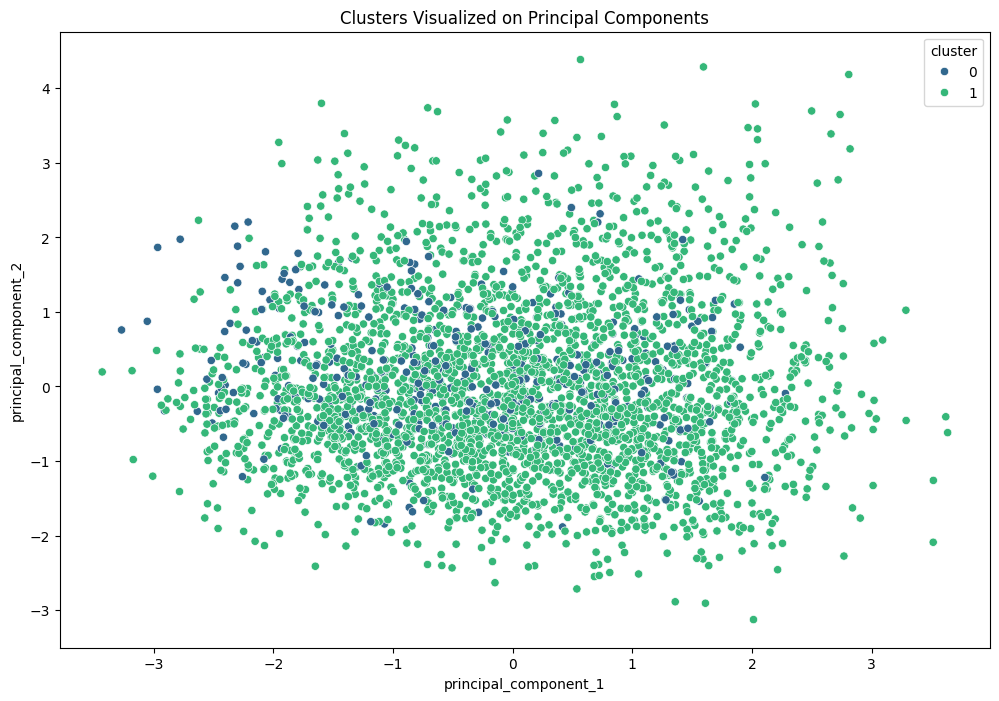

In [ ]:
# Plot clusters against two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])

# Reset index to avoid duplicate index labels
df_pca = df_pca.reset_index(drop=True)
df_clusters = df[['cluster']].reset_index(drop=True)

# Concatenate the principal components and cluster labels
df_pca = pd.concat([df_pca, df_clusters], axis=1)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Clusters Visualized on Principal Components')
plt.show()

### Classification and Clustering Algorithms Applied to the Dataset

#### Logistic Regression
**Use Case**: Logistic regression is used for binary classification problems, where the goal is to predict one of two possible outcomes.

**Why Chosen**:
- The `malicious` field is a binary variable indicating whether an activity is malicious or not.
- Logistic regression is well-suited for this type of binary classification problem as it models the probability of an event occurring based on input features.
- It provides coefficients that indicate the influence of each feature on the outcome, making it interpretable.

#### Random Forest
**Use Case**: Random Forest is an ensemble learning method used for classification (and regression) that constructs multiple decision trees during training and outputs the mode of the classes for classification.

**Why Chosen**:
- Random Forest is robust to overfitting and can handle a large number of input features, suitable for our dataset with numerous dummy variables.
- It provides feature importance scores, helping understand which features are most predictive of malicious activities.
- Given the potentially complex relationships between features in our data, Random Forest is excellent at capturing these interactions.

### Clustering Algorithm

#### KMeans Clustering
**Use Case**: KMeans is a clustering algorithm used to partition a dataset into K distinct, non-overlapping subsets (clusters).

**Why Chosen**:
- Clustering helps identify patterns or groupings within the data without prior knowledge of the labels.
- For our dataset, applying KMeans can reveal natural groupings of activities, which might correspond to different types of behavior (e.g., normal user activity vs. potential malicious activity).
- Clustering is useful in security contexts to discover unknown or emerging threats by grouping similar behaviors together.

### Explanation in Context

1. **Data Characteristics**:
    - The dataset consists of user activities over the past three months.
    - Activities are labeled as either malicious or non-malicious.

2. **Classification Goals**:
    - **Predict Malicious Activities**: The primary goal is to classify activities as malicious or not. This is crucial for real-time threat detection and prevention.
    - **Logistic Regression**: Chosen for its simplicity and interpretability. It provides a baseline model and helps understand the direct influence of each feature on the prediction.
    - **Random Forest**: Chosen for its robustness and ability to handle complex interactions between features. It is particularly useful when dealing with a large number of categorical features (encoded as dummy variables).

3. **Clustering Goals**:
    - **Unsupervised Pattern Discovery**: By applying KMeans clustering, we aim to discover patterns or groupings in the data that might indicate different user behavior profiles. This can help in identifying anomalous patterns that do not fit the typical activity profiles.
    - **Security Insights**: Clustering can reveal groups of activities that might correspond to different types of attacks or abnormal behaviors, aiding in proactive threat hunting and anomaly detection.

### Summary

- **Logistic Regression**: Provides a straightforward approach to binary classification, helping to predict whether an activity is malicious based on historical data.
- **Random Forest**: Offers a more complex model that can capture intricate relationships between features, improving classification accuracy and providing insights into feature importance.
- **KMeans Clustering**: Helps in identifying natural groupings within the data, uncovering hidden patterns that could signify different behavior profiles or potential threats.

By using these algorithms, we aim to achieve a comprehensive understanding of user activities, accurately predict malicious behavior, and uncover any hidden patterns that could indicate security threats. This multi-faceted approach leverages both supervised and unsupervised learning techniques to enhance overall security and threat detection capabilities.


## Machine Learning Model Results Explanation

### 1. Logistic Regression Classification Report and Confusion Matrix

**Classification Report:**
- **Precision (Class 0):** 0.92
- **Recall (Class 0):** 1.00
- **F1-score (Class 0):** 0.96
- **Precision (Class 1):** 1.00
- **Recall (Class 1):** 0.72
- **F1-score (Class 1):** 0.84
- **Accuracy:** 0.93

**Confusion Matrix:**
- **True Negatives (0,0):** 771
- **False Positives (0,1):** 0
- **False Negatives (1,0):** 66
- **True Positives (1,1):** 169

**Interpretation:**
The logistic regression model shows high precision and recall for non-malicious activities (Class 0). However, it has a lower recall for malicious activities (Class 1), meaning it missed some malicious activities. Overall accuracy is high at 93%.

### 2. Random Forest Classification Report and Confusion Matrix

**Classification Report:**
- **Precision (Class 0):** 0.92
- **Recall (Class 0):** 1.00
- **F1-score (Class 0):** 0.96
- **Precision (Class 1):** 0.99
- **Recall (Class 1):** 0.72
- **F1-score (Class 1):** 0.83
- **Accuracy:** 0.93

**Confusion Matrix:**
- **True Negatives (0,0):** 770
- **False Positives (0,1):** 1
- **False Negatives (1,0):** 66
- **True Positives (1,1):** 169

**Interpretation:**
The random forest model also shows high precision and recall for non-malicious activities (Class 0). Similar to logistic regression, it has a lower recall for malicious activities (Class 1). The overall accuracy is the same at 93%.

### 3. KMeans Clustering Results

**Cluster Distribution:**
- **Cluster 0:** 2946
- **Cluster 1:** 407

**Interpretation:**
KMeans clustering identified two clusters. Cluster 0 contains the majority of the data points, while Cluster 1 has significantly fewer. This indicates a separation in the data, which could be due to different patterns of activities.

### 4. Clusters Visualized on Principal Components

**PCA Scatter Plot:**
The scatter plot visualizes the two principal components with data points colored by their assigned clusters. The clear separation between the two clusters suggests that the clustering algorithm has successfully identified distinct groups in the data.

**Interpretation:**
The PCA plot confirms that there are two main clusters in the data, with a clear separation between them. This separation could represent different patterns of activities, potentially distinguishing between normal and malicious activities.

## Conclusion
- **Logistic Regression** and **Random Forest** both provide high accuracy for classifying activities. They are effective in identifying non-malicious activities but have a lower recall for malicious activities.
- **KMeans Clustering** successfully identified two distinct clusters in the data, which may correspond to different patterns of activities (e.g., normal vs. malicious).
- The **PCA visualization** confirms the presence of two main clusters, supporting the clustering results.

These models and visualizations help in understanding the patterns of activities in the logs and identifying potential malicious activities.
